# Titanic Survivor Predictions

From Kaggle Competition, this notebook contains a model to compete in *Titanic - Machine Learning from Disaster*, that can be found here: https://www.kaggle.com/competitions/titanic/overview.

## 1. Problem Definition 

Use machine learning to create a model that predicts which passengers survived the Titanic shipwreck.

## 2. Data

The data can be downloaded here: https://www.kaggle.com/competitions/titanic/data.

The data has been split into two groups:

* training set (train.csv)
* test set (test.csv)

## 3. Evaluation

Kaggle doesn't provides thersholds for this competition so the aim is to maximize model's **accuracy**.

## 4. Features

Data Dictionary:

1. survival: Survival
    * 0 = No
    * 1 = Yes
2. pclass: Ticket class	
    * 1 = 1st class
    * 2 = 2nd class
    * 3 = 3rd class
3. sex: Sex
4. Age:	Age in years
5. sibsp: Number of siblings / spouses aboard the Titanic	
6. parch: Number of parents / children aboard the Titanic	
7. ticket: Ticket number	
8. fare: Passenger fare	
9. cabin: Cabin number	
10. embarked: Port of Embarkation
    * C = Cherbourg
    * Q = Queenstown
    * S = Southampton

## Explorative Data Analysis

In [90]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Import the DataFrame
df_train = pd.read_csv("Data/titanic/train.csv")
df_test = pd.read_csv("Data/titanic/test.csv")

In [91]:
# Checking the train data head and infos
df_train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [92]:
# Check for missing values in test set
df_test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

Since the Cabin column has the 77% of missing data is convinient to drop that.

Another columns to drop are: Name and ticket number.

In [93]:
train = df_train.drop(["Cabin", "Name", "Ticket"], axis = 1)
test = df_test.drop(["Cabin", "Name", "Ticket"], axis = 1)

In [94]:
train

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.2500,S
1,2,1,1,female,38.0,1,0,71.2833,C
2,3,1,3,female,26.0,0,0,7.9250,S
3,4,1,1,female,35.0,1,0,53.1000,S
4,5,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...,...
886,887,0,2,male,27.0,0,0,13.0000,S
887,888,1,1,female,19.0,0,0,30.0000,S
888,889,0,3,female,NaN,1,2,23.4500,S
889,890,1,1,male,26.0,0,0,30.0000,C


Now proced to EDA using only training set.

Check the distribution of `Pclass`.

<AxesSubplot:>

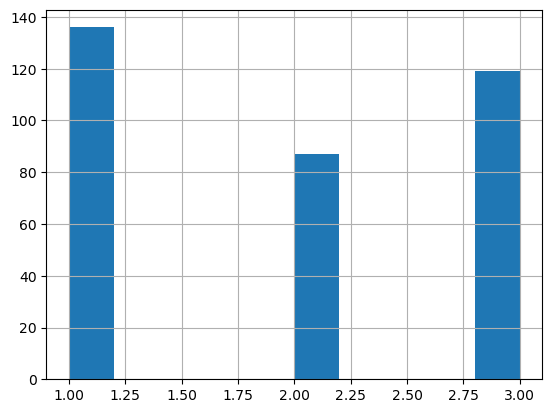

In [95]:
train["Pclass"][train.Survived == 1].hist()

### Ditribution of ages

Try to visualize the distribution of passengers' age.

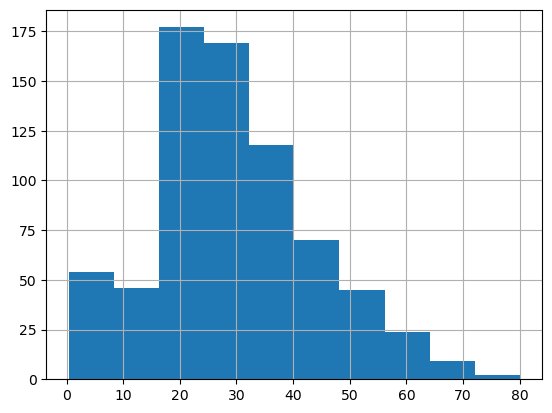

In [96]:
train.Age.hist();

### Fare vs Age

Let's try to visualize the correlation between `Age` and `Fare`.

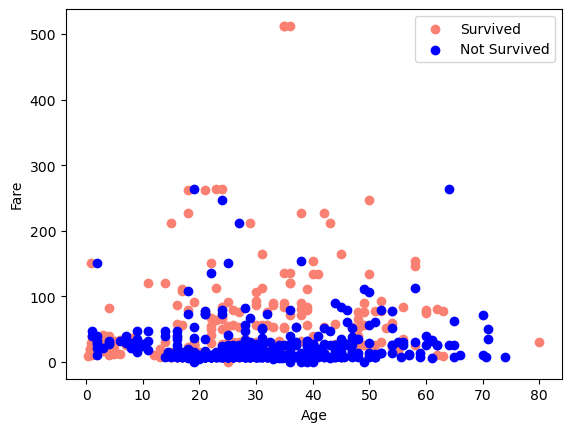

In [97]:
plt.scatter(train.Age[train.Survived == 1],
            train.Fare[train.Survived == 1],
            c = "Salmon")

plt.scatter(train.Age[train.Survived == 0],
            train.Fare[train.Survived == 0],
            c = "Blue")

plt.xlabel("Age")
plt.ylabel("Fare")
plt.legend(["Survived", "Not Survived"])

As it is showed by the plot, the more was the fare the more was the probability to survive.

## Feature Engineering


In [69]:
train.info(), test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    object 
 4   Age          714 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Fare         891 non-null    float64
 8   Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(2)
memory usage: 62.8+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Sex          418 non-null    object 
 3   Age          332 non-null    float64
 4   SibSp     

(None, None)

As we can see, we have some missing values in the two datasets and we have also some categorical variables.

In [98]:
train["Embarked"].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [107]:
train.Embarked.mode()

0    S
Name: Embarked, dtype: object

In [103]:
# Fill non numerical values with mode
train["Embarked"] = train.Embarked.fillna("S")

In [104]:
# Fill numerical values
train["Age"] = train.Age.fillna(train.Age.mean())
test["Age"] = test.Age.fillna(test.Age.mean())
test["Fare"] = test.Fare.fillna(test.Fare.median())

In [105]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Sex          418 non-null    object 
 3   Age          418 non-null    float64
 4   SibSp        418 non-null    int64  
 5   Parch        418 non-null    int64  
 6   Fare         418 non-null    float64
 7   Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 26.2+ KB


In [106]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    object 
 4   Age          891 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Fare         891 non-null    float64
 8   Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(2)
memory usage: 62.8+ KB


In [115]:
# Replace non numerical values with numerical category.

train["Sex"] = train.Sex.replace(["male", "female"], [0, 1])
train["Embarked"] = train.Embarked.replace(["C", "Q", "S"], [1, 2, 3])
test["Sex"] = test.Sex.replace(["male", "female"], [0, 1])
test["Embarked"] = test.Embarked.replace(["C", "Q", "S"], [1, 2, 3])

In [116]:
train.info(), test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    int64  
 4   Age          891 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Fare         891 non-null    float64
 8   Embarked     891 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 62.8 KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Sex          418 non-null    int64  
 3   Age          418 non-null    float64
 4   SibSp        418 non-n

(None, None)

## Modelling

In [139]:
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

def fit_and_score(model_dict, X_train, y_train, X_test, y_test):
    np.random.seed(42)
    scores = {}
    for name, model in model_dict.items():
        model.fit(X_train, y_train)
        scores[name] = model.score(X_test, y_test)
    return scores        

In [145]:
models = {"Random Forest": RandomForestClassifier(),
          "KNN": KNeighborsClassifier(),
          "LinearSVC": LinearSVC()}

In [146]:
X_train = train.drop("Survived", axis = 1)
y_train = train["Survived"]

In [147]:
X_test = test

In [148]:
gender_submission  = pd.read_csv("Data/titanic/gender_submission.csv")
y_test = gender_submission["Survived"]

In [149]:
fit_and_score(model_dict = models,
              X_train = X_train, y_train = y_train,
              X_test = X_test, y_test = y_test)

D:\ML-projects\titanic-kaggle-competition\env\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


{'Random Forest': 0.7894736842105263,
 'KNN': 0.6483253588516746,
 'LinearSVC': 0.3684210526315789}

In [151]:
clf = RandomForestClassifier(random_state = 42)

clf.fit(X_train, y_train)
predictions = clf.predict(X_test)
clf.score(X_test, y_test)

0.7894736842105263

In [152]:
d_sol = {"PassengerId": gender_submission["PassengerId"],
         "Survived": predictions}

In [153]:
sol = pd.DataFrame(d_sol)
sol

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [154]:
sol.to_csv("sol.csv", index = False)